In [1]:
# Define constants

DATA_PATH = 'data/repo_metadata.json'

# cd to repo root
import os
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
# Import data with pandas

import pandas as pd

compression = None if DATA_PATH.endswith('.json') else 'infer'
df = pd.read_json(DATA_PATH, compression=compression)

print("Data loaded from {}.".format(DATA_PATH))

Data loaded from data/repo_metadata.json.


In [3]:
# Print data column names, number of rows, and first order statistics

print(f"Data columns: {df.columns}")
print(f"Number of rows: {len(df)}")
print(f"First row:\n{df.head(1)}")

Data columns: Index(['owner', 'name', 'stars', 'forks', 'watchers', 'isFork', 'isArchived',
       'languages', 'diskUsageKb', 'pullRequests', 'description',
       'primaryLanguage', 'createdAt', 'pushedAt', 'defaultBranchCommitCount',
       'license', 'assignableUserCount', 'codeOfConduct', 'forkingAllowed',
       'nameWithOwner', 'parent'],
      dtype='object')
Number of rows: 2917951
First row:
          owner          name   stars  forks  watchers  isFork  isArchived  \
0  freeCodeCamp  freeCodeCamp  359805  30814      8448   False       False   

                                           languages  diskUsageKb  \
0  [{'name': 'TypeScript', 'size': 1125180}, {'na...       377334   

   pullRequests  ... primaryLanguage             createdAt  \
0         31867  ...      TypeScript  2014-12-24T17:49:19Z   

               pushedAt defaultBranchCommitCount  \
0  2023-01-21T15:05:31Z                  32231.0   

                                   license assignableUserCount  codeO

<AxesSubplot: title={'center': 'Top 10 languages'}, xlabel='primaryLanguage', ylabel='Number of repositories'>

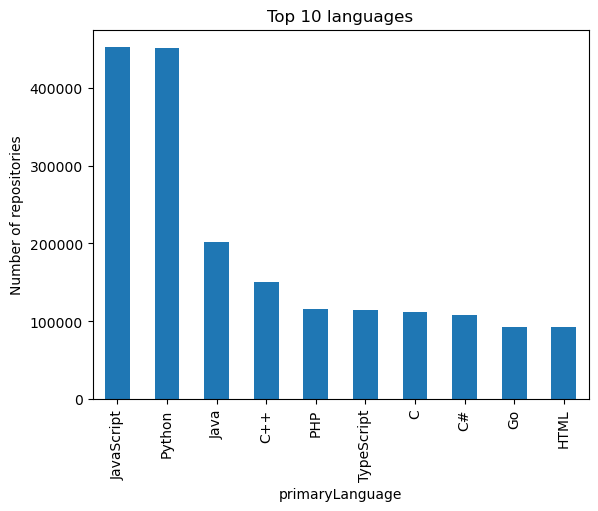

In [4]:
import matplotlib.pyplot as plt

# Group by 'primaryLanguage' and show a bar graph of the top 10 languages, make sure the bar chart has a title and axis labels
plt.title('Top 10 languages')
plt.ylabel('Number of repositories')
df.groupby('primaryLanguage').size().sort_values(ascending=False).head(10).plot.bar()

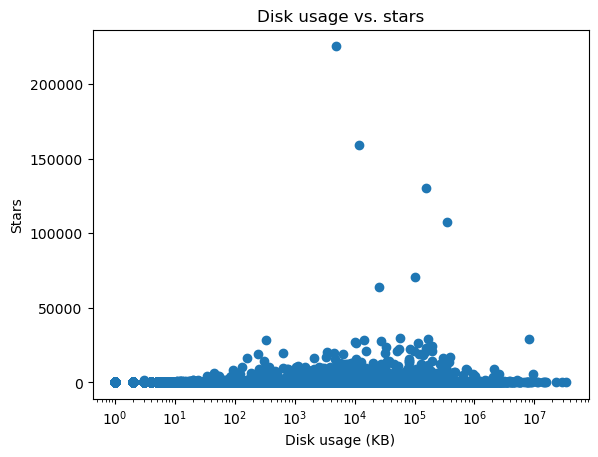

In [5]:
# Make a scatter plot of diskUsageKb against stars, make sure the scatter plot has a title and axis labels
# There are 3 million rows in the data, so we'll only plot a sample of 100000 rows
# Use log scale for the x axis
plt.title('Disk usage vs. stars')
plt.xlabel('Disk usage (KB)')
plt.ylabel('Stars')
plt.xscale('log')
sample = df.sample(100000)
plt.scatter(sample.diskUsageKb, sample.stars)